In [1]:
import pandas as pd
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import requests

In [2]:
df = pd.read_csv("Datensammlung_plus_Topic.csv", encoding="utf-8")
topics = pd.read_csv("Model_Info_in_df.csv", encoding = "utf-8")

C:\Users\denni\AppData\Local\Temp\ipykernel_4496\1035740910.py:1: DtypeWarning: Columns (32) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("Datensammlung_plus_Topic.csv", encoding="utf-8")


Replacing the topic-ID in the Dataframe for the topic-name

In [ ]:
topic_mapping = topics.set_index('ID')['Name'] 

In [5]:
df['topic'] = df['topic'].map(topic_mapping)

In [ ]:
#df.to_csv("Datensammlung_Topic.csv", encoding="utf-8")

In [ ]:
#combining CDU and CSU
df.loc[df['Fraktion oder Gruppe (Partei)'] == 'CDU/CSU (CDU)', 'Fraktion oder Gruppe (Partei)'] = 'CDU/CSU'
df.loc[df['Fraktion oder Gruppe (Partei)'] == 'CDU/CSU (CSU)', 'Fraktion oder Gruppe (Partei)'] = 'CDU/CSU'

Creating year specific dataframes and combining those

In [8]:
Jahr_2021_df2 = df.loc[df["Jahr"] == 2021.0]
Jahr_2022_df2 = df.loc[df["Jahr"] == 2022.0]
Jahr_2023_df2 = df.loc[df["Jahr"] == 2023.0]
Jahr_2024_df2 = df.loc[df["Jahr"] == 2024.0]
Jahr_2025_df2 = df.loc[df["Jahr"] == 2025.0]

In [10]:
df = pd.concat([Jahr_2021_df2, Jahr_2022_df2, Jahr_2023_df2, Jahr_2024_df2, Jahr_2025_df2], axis=0, ignore_index=True)

In [ ]:
#df.to_csv("begrenzte_Datensammlung.csv", encoding="utf-8")

In [3]:
df = pd.read_csv("begrenzte_Datensammlung.csv", encoding="utf-8")

Seperating the dataframe by sentiment

In [4]:
positive = df.loc[df['Sentiment'] == 'positive']
negative = df.loc[df['Sentiment'] == "negative"]
neutral = df.loc[df['Sentiment'] == "neutral"]

positive.reset_index(inplace = True)
negative.reset_index(inplace = True)
neutral.reset_index(inplace = True)

# Top 10 Topics

Top 10 topics per sentiment and in generall

In [5]:
topic_counts_pos = positive.groupby(["topic"]).size().reset_index(name='Count')
topic_counts_neg = negative.groupby(["topic"]).size().reset_index(name='Count')
topic_counts_neu = neutral.groupby(["topic"]).size().reset_index(name='Count')

In [ ]:
topic_counts_pos.nlargest(10, 'Count').to_csv("Top_10_Topics_pos.csv", encoding="utf-8")
topic_counts_neu.nlargest(10, 'Count').to_csv("Top_10_Topics_neu.csv", encoding="utf-8")
topic_counts_neg.nlargest(10, 'Count').to_csv("Top_10_Topics_neg.csv", encoding="utf-8")

In [107]:
top_10_topic = df.groupby(["topic"]).size().reset_index(name='Count')
top_10_topic.nlargest(10, 'Count').to_csv("Top_10_Topics.csv", encoding="utf-8")

# Wordclouds

Creating the wordclouds 

(with Code from Michael Achmann-Denkler)

In [ ]:
def generate_wordcloud(text, path):

    text = ' '.join(list(text))

    wordcloud = WordCloud(background_color="white",width=1920, height=1080).generate(text)

    plt.imshow(wordcloud, interpolation="bilinear") 
    plt.axis("off")
    plt.savefig(path, dpi=300)
    plt.show()

In [ ]:
stopwords_extension_wc = ''

r = requests.get('https://github.com/stopwords-iso/stopwords-de/raw/master/stopwords-de.json')
stop_words = r.json()

stopwords_extension_wc_list = stopwords_extension_wc.split(' ')
stop_words.extend(stopwords_extension_wc_list)

STOPWORDS.update(stop_words)

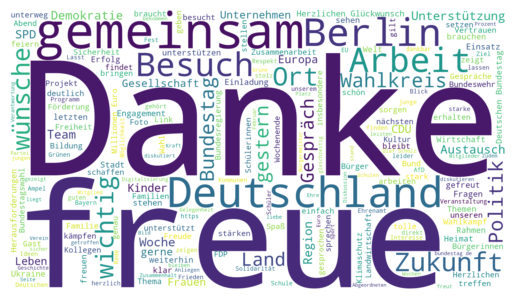

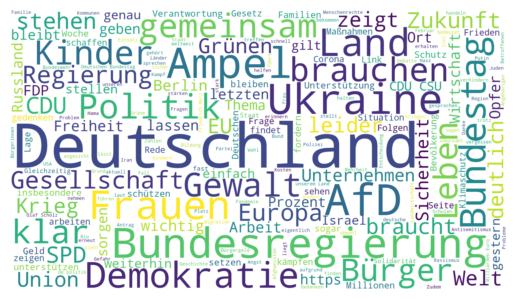

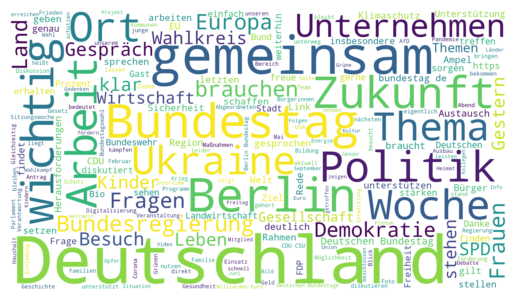

In [17]:
generate_wordcloud(positive["body"], "Wordcloud_pos.png")
generate_wordcloud(negative["body"], "Wordcloud_neg.png")
generate_wordcloud(neutral["body"], "Wordcloud_neu.png")

# Ampelbruch

Seperating the years

In [6]:
Jahr_2021 = df.loc[df["Jahr"] == 2021.0]
Jahr_2022 = df.loc[df["Jahr"] == 2022.0]
Jahr_2023 = df.loc[df["Jahr"] == 2023.0]
Jahr_2024 = df.loc[df["Jahr"] == 2024.0]
Jahr_2025 = df.loc[df["Jahr"] == 2025.0]

In [7]:
def topic_per_day (dataframe):
    # Gruppiere nach Monat, Tag und Topic, zähle die Vorkommen
    topic_counts = dataframe.groupby(['Monat', 'Tag', 'topic']).size().reset_index(name='Count')

    # Finde das häufigste Topic für jeden Tag
    most_frequent_topics = topic_counts.loc[topic_counts.groupby(['Monat', 'Tag'])['Count'].idxmax()]

    # Wähle nur die relevanten Spalten
    result = most_frequent_topics[['Monat', 'Tag', 'topic']]
    res = result.groupby(["Monat", "topic"]).size()
    return res

In [8]:
topic_2021 = topic_per_day(Jahr_2021)
topic_2022 = topic_per_day(Jahr_2022)
topic_2023 = topic_per_day(Jahr_2023)
topic_2024 = topic_per_day(Jahr_2024)
topic_2025 = topic_per_day(Jahr_2025)

Most common topics per day

In [ ]:
topic_counts = df.groupby(['Jahr', 'Monat', 'Tag', 'topic']).size().reset_index(name='counts')

most_common_topics = topic_counts.loc[topic_counts.groupby(['Jahr', 'Monat', 'Tag'])['counts'].idxmax()]

In [10]:
most_common_topics

,Jahr,Monat,Tag,topic,counts
24,2021.0,1.0,1.0,6_jahr_wünsche_weihnachten_advent,95
59,2021.0,1.0,2.0,6_jahr_wünsche_weihnachten_advent,12
84,2021.0,1.0,3.0,37_schnee_winter_snow_ice,11
100,2021.0,1.0,4.0,0_berlin_bundestag_usa_heute,13
140,2021.0,1.0,5.0,0_berlin_bundestag_usa_heute,19
...,...,...,...,...,...
80645,2025.0,2.0,22.0,2_spd_cdu_bundestag_demokratie,108
80676,2025.0,2.0,23.0,2_spd_cdu_bundestag_demokratie,92
80696,2025.0,2.0,24.0,2_spd_cdu_bundestag_demokratie,17
80701,2025.0,2.0,25.0,15_pizza_kaffee_tafel_pizza politik,1


Filtering the most common topics per year

In [11]:
Jahr_2021 = most_common_topics.loc[most_common_topics["Jahr"] == 2021.0]
Jahr_2022 = most_common_topics.loc[most_common_topics["Jahr"] == 2022.0]
Jahr_2023 = most_common_topics.loc[most_common_topics["Jahr"] == 2023.0]
Jahr_2024 = most_common_topics.loc[most_common_topics["Jahr"] == 2024.0]
Jahr_2025 = most_common_topics.loc[most_common_topics["Jahr"] == 2025.0]

In [12]:
September_24 = Jahr_2024.loc[Jahr_2024["Monat"]== 9]
Oktober_24 = Jahr_2024.loc[Jahr_2024["Monat"]== 10]
November_24 = Jahr_2024.loc[Jahr_2024["Monat"]== 11]
Dezember_24 = Jahr_2024.loc[Jahr_2024["Monat"]== 12]

Sentiment specific most common topics

In [13]:
topic_counts_pos_2 = positive.groupby(['Jahr', 'Monat', 'Tag', 'topic']).size().reset_index(name='counts')
most_common_topics_pos = topic_counts_pos_2.loc[topic_counts_pos_2.groupby(['Jahr', 'Monat', 'Tag'])['counts'].idxmax()]

In [14]:
topic_counts_neg_2 = negative.groupby(['Jahr', 'Monat', 'Tag', 'topic']).size().reset_index(name='counts')
most_common_topics_neg = topic_counts_neg_2.loc[topic_counts_neg_2.groupby(['Jahr', 'Monat', 'Tag'])['counts'].idxmax()]

In [15]:
topic_counts_neu_2 = neutral.groupby(['Jahr', 'Monat', 'Tag', 'topic']).size().reset_index(name='counts')
most_common_topics_neu = topic_counts_neu_2.loc[topic_counts_neu_2.groupby(['Jahr', 'Monat', 'Tag'])['counts'].idxmax()]

Positive topics Ampelbruch

In [16]:
Jahr_2024_pos = most_common_topics_pos.loc[most_common_topics_pos["Jahr"] == 2024.0]

September_24_pos = Jahr_2024_pos.loc[Jahr_2024_pos["Monat"]== 9]
Oktober_24_pos = Jahr_2024_pos.loc[Jahr_2024_pos["Monat"]== 10]
November_24_pos = Jahr_2024_pos.loc[Jahr_2024_pos["Monat"]== 11]
Dezember_24_pos = Jahr_2024_pos.loc[Jahr_2024_pos["Monat"]== 12]

Negative topics Ampelbruch

In [17]:
Jahr_2024_neg = most_common_topics_neg.loc[most_common_topics_neg["Jahr"] == 2024.0]

September_24_neg = Jahr_2024_neg.loc[Jahr_2024_neg["Monat"]== 9]
Oktober_24_neg = Jahr_2024_neg.loc[Jahr_2024_neg["Monat"]== 10]
November_24_neg = Jahr_2024_neg.loc[Jahr_2024_neg["Monat"]== 11]
Dezember_24_neg = Jahr_2024_neg.loc[Jahr_2024_neg["Monat"]== 12]

Neutral topics Ampelbruch

In [18]:
Jahr_2024_neu = most_common_topics_neu.loc[most_common_topics_neu["Jahr"] == 2024.0]

September_24_neu = Jahr_2024_neu.loc[Jahr_2024_neu["Monat"]== 9]
Oktober_24_neu = Jahr_2024_neu.loc[Jahr_2024_neu["Monat"]== 10]
November_24_neu = Jahr_2024_neu.loc[Jahr_2024_neu["Monat"]== 11]
Dezember_24_neu = Jahr_2024_neu.loc[Jahr_2024_neu["Monat"]== 12]

Comparison

In [19]:
S_pos = September_24_pos["topic"].to_list()
S_neu = September_24_neu["topic"].to_list()
S_neg = September_24_neg["topic"].to_list()


September_24["positive"] = S_pos
September_24["neutral"] = S_neu
September_24["negative"] = S_neg

C:\Users\denni\AppData\Local\Temp\ipykernel_17416\2652813267.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  September_24["positive"] = S_pos
C:\Users\denni\AppData\Local\Temp\ipykernel_17416\2652813267.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  September_24["neutral"] = S_neu
C:\Users\denni\AppData\Local\Temp\ipykernel_17416\2652813267.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See t

Month specific overviews

In [20]:
O_pos = Oktober_24_pos["topic"].to_list()
O_neu = Oktober_24_neu["topic"].to_list()
O_neg = Oktober_24_neg["topic"].to_list()


Oktober_24["positive"] = O_pos
Oktober_24["neutral"] = O_neu
Oktober_24["negative"] = O_neg

C:\Users\denni\AppData\Local\Temp\ipykernel_17416\3289942868.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Oktober_24["positive"] = O_pos
C:\Users\denni\AppData\Local\Temp\ipykernel_17416\3289942868.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Oktober_24["neutral"] = O_neu
C:\Users\denni\AppData\Local\Temp\ipykernel_17416\3289942868.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the c

In [21]:
N_pos = November_24_pos["topic"].to_list()
N_neu = November_24_neu["topic"].to_list()
N_neg = November_24_neg["topic"].to_list()


November_24["positive"] = N_pos
November_24["neutral"] = N_neu
November_24["negative"] = N_neg

C:\Users\denni\AppData\Local\Temp\ipykernel_17416\740030899.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  November_24["positive"] = N_pos
C:\Users\denni\AppData\Local\Temp\ipykernel_17416\740030899.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  November_24["neutral"] = N_neu
C:\Users\denni\AppData\Local\Temp\ipykernel_17416\740030899.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the ca

In [22]:
D_pos = Dezember_24_pos["topic"].to_list()
D_neu = Dezember_24_neu["topic"].to_list()
D_neg = Dezember_24_neg["topic"].to_list()


Dezember_24["positive"] = D_pos
Dezember_24["neutral"] = D_neu
Dezember_24["negative"] = D_neg

C:\Users\denni\AppData\Local\Temp\ipykernel_17416\4201748398.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Dezember_24["positive"] = D_pos
C:\Users\denni\AppData\Local\Temp\ipykernel_17416\4201748398.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Dezember_24["neutral"] = D_neu
C:\Users\denni\AppData\Local\Temp\ipykernel_17416\4201748398.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the

In [23]:
November_24

,Jahr,Monat,Tag,topic,counts,positive,neutral,negative
73874,2024.0,11.0,1.0,0_berlin_bundestag_usa_heute,47,6_jahr_wünsche_weihnachten_advent,0_berlin_bundestag_usa_heute,10_euro_bürgergeld_rente_prozent
73929,2024.0,11.0,2.0,0_berlin_bundestag_usa_heute,33,0_berlin_bundestag_usa_heute,1_euro_feuerwehr_mehr_ehrenamt,1_euro_feuerwehr_mehr_ehrenamt
73981,2024.0,11.0,3.0,0_berlin_bundestag_usa_heute,38,0_berlin_bundestag_usa_heute,0_berlin_bundestag_usa_heute,2_spd_cdu_bundestag_demokratie
74029,2024.0,11.0,4.0,0_berlin_bundestag_usa_heute,70,0_berlin_bundestag_usa_heute,0_berlin_bundestag_usa_heute,1_euro_feuerwehr_mehr_ehrenamt
74085,2024.0,11.0,5.0,0_berlin_bundestag_usa_heute,62,0_berlin_bundestag_usa_heute,0_berlin_bundestag_usa_heute,1_euro_feuerwehr_mehr_ehrenamt
74180,2024.0,11.0,6.0,3_ukraine_belarus_türkei_bundeswehr,160,3_ukraine_belarus_türkei_bundeswehr,3_ukraine_belarus_türkei_bundeswehr,3_ukraine_belarus_türkei_bundeswehr
74237,2024.0,11.0,7.0,2_spd_cdu_bundestag_demokratie,234,2_spd_cdu_bundestag_demokratie,2_spd_cdu_bundestag_demokratie,2_spd_cdu_bundestag_demokratie
74300,2024.0,11.0,8.0,2_spd_cdu_bundestag_demokratie,97,0_berlin_bundestag_usa_heute,2_spd_cdu_bundestag_demokratie,2_spd_cdu_bundestag_demokratie
74362,2024.0,11.0,9.0,4_rassismus_menschen_opfer_gedenken,271,4_rassismus_menschen_opfer_gedenken,4_rassismus_menschen_opfer_gedenken,4_rassismus_menschen_opfer_gedenken
74379,2024.0,11.0,10.0,0_berlin_bundestag_usa_heute,54,0_berlin_bundestag_usa_heute,2_spd_cdu_bundestag_demokratie,4_rassismus_menschen_opfer_gedenken


In [24]:
Dezember_24

,Jahr,Monat,Tag,topic,counts,positive,neutral,negative
75597,2024.0,12.0,1.0,6_jahr_wünsche_weihnachten_advent,186,6_jahr_wünsche_weihnachten_advent,4_rassismus_menschen_opfer_gedenken,4_rassismus_menschen_opfer_gedenken
75609,2024.0,12.0,2.0,0_berlin_bundestag_usa_heute,69,0_berlin_bundestag_usa_heute,0_berlin_bundestag_usa_heute,3_ukraine_belarus_türkei_bundeswehr
75660,2024.0,12.0,3.0,0_berlin_bundestag_usa_heute,85,0_berlin_bundestag_usa_heute,28_behinderung_behinderungen_menschen behinder...,28_behinderung_behinderungen_menschen behinder...
75720,2024.0,12.0,4.0,0_berlin_bundestag_usa_heute,100,0_berlin_bundestag_usa_heute,0_berlin_bundestag_usa_heute,1_euro_feuerwehr_mehr_ehrenamt
75803,2024.0,12.0,5.0,1_euro_feuerwehr_mehr_ehrenamt,197,1_euro_feuerwehr_mehr_ehrenamt,1_euro_feuerwehr_mehr_ehrenamt,1_euro_feuerwehr_mehr_ehrenamt
75895,2024.0,12.0,6.0,6_jahr_wünsche_weihnachten_advent,92,6_jahr_wünsche_weihnachten_advent,0_berlin_bundestag_usa_heute,9_frauen_gewalt_gewalt frauen_mädchen
75926,2024.0,12.0,7.0,2_spd_cdu_bundestag_demokratie,72,2_spd_cdu_bundestag_demokratie,0_berlin_bundestag_usa_heute,9_frauen_gewalt_gewalt frauen_mädchen
76003,2024.0,12.0,8.0,6_jahr_wünsche_weihnachten_advent,138,6_jahr_wünsche_weihnachten_advent,6_jahr_wünsche_weihnachten_advent,3_ukraine_belarus_türkei_bundeswehr
76016,2024.0,12.0,9.0,0_berlin_bundestag_usa_heute,80,0_berlin_bundestag_usa_heute,0_berlin_bundestag_usa_heute,3_ukraine_belarus_türkei_bundeswehr
76085,2024.0,12.0,10.0,1_euro_feuerwehr_mehr_ehrenamt,73,0_berlin_bundestag_usa_heute,1_euro_feuerwehr_mehr_ehrenamt,3_ukraine_belarus_türkei_bundeswehr


In [ ]:
#save as csv
November_24.to_csv("November_24_Topic_Overview.csv", encoding="utf-8")
Dezember_24.to_csv("Dezember_24_Topic_Overview.csv", encoding="utf-8")

# Top 10 topic per party

Creating party specific dataframes

In [ ]:
gruene = pd.DataFrame(df[(df == 'Grüne').any(axis=1)])
spd = pd.DataFrame(df[(df == 'SPD').any(axis=1)])
cdu_csu = pd.DataFrame(df[(df == 'CDU/CSU').any(axis=1)])
fdp = pd.DataFrame(df[(df == 'FDP').any(axis=1)])
afd = pd.DataFrame(df[(df == 'AfD').any(axis=1)])
linke = pd.DataFrame(df[(df == 'Die Linke').any(axis=1)])
fraktionslos = pd.DataFrame(df[(df == 'fraktionslos').any(axis=1)])
bsw = pd.DataFrame(df[(df == 'BSW').any(axis=1)])

Function creating and saving the overview of the Top 10 topics per given party

In [177]:
def parteien_uebersicht(partei, titel):
    positive = partei.loc[partei['Sentiment'] == 'positive']
    negative = partei.loc[partei['Sentiment'] == "negative"]
    neutral = partei.loc[partei['Sentiment'] == "neutral"]

    positive.reset_index(inplace = True)
    negative.reset_index(inplace = True)
    neutral.reset_index(inplace = True)
    
    
    topic_counts_pos = positive.groupby(["topic"]).size().reset_index(name='Count')
    topic_counts_neg = negative.groupby(["topic"]).size().reset_index(name='Count')
    topic_counts_neu = neutral.groupby(["topic"]).size().reset_index(name='Count')

    topic_counts_pos.nlargest(10, 'Count').to_csv("Parteien_Top_Ten/" + titel + "-Top_10_Topics_pos.csv", encoding="utf-8")
    topic_counts_neu.nlargest(10, 'Count').to_csv("Parteien_Top_Ten/" + titel + "-Top_10_Topics_neu.csv", encoding="utf-8")
    topic_counts_neg.nlargest(10, 'Count').to_csv("Parteien_Top_Ten/" + titel + "_Top_10_Topics_neg.csv", encoding="utf-8")

    top_10_topic = partei.groupby(["topic"]).size().reset_index(name='Count')
    top_10_topic.nlargest(10, 'Count').to_csv("Parteien_Top_Ten/" + titel + "_Top_10_Topics.csv", encoding="utf-8")


    DF = pd.DataFrame()
    D_ges = top_10_topic.nlargest(10, 'Count')["topic"].to_list()
    D_pos = topic_counts_pos.nlargest(10, 'Count')["topic"].to_list()
    D_neu = topic_counts_neu.nlargest(10, 'Count')["topic"].to_list()
    D_neg = topic_counts_neg.nlargest(10, 'Count')["topic"].to_list()

    DF["Gesamt"] = D_ges
    DF["positive"] = D_pos
    DF["neutral"] = D_neu
    DF["negative"] = D_neg

    DF.to_csv("Parteien_Top_Ten/" + titel + "_overview.csv", encoding="utf-8")

    return DF


In [178]:
gruene_10 = parteien_uebersicht(gruene, "Gruene")
spd_10 = parteien_uebersicht(spd, "SPD")
cdu_csu_10 = parteien_uebersicht(cdu_csu, "CDU_CSU")
fdp_10 = parteien_uebersicht(fdp, "FDP")
afd_spd_10 = parteien_uebersicht(afd, "AfD")
linke_10 = parteien_uebersicht(linke, "Linke")
f_10 = parteien_uebersicht(fraktionslos, "Fraktionslos")
bsw_10 = parteien_uebersicht(bsw, "BSW")